In [132]:
#Esse é um desafio para fazer limpeza e criar graficos de dados financeiros de pessoas d região sul do país>

#importando bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importando os dados
dataset = pd.read_csv("Churn.csv",sep=";")

In [5]:
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [9]:
dataset.shape

(999, 12)

In [13]:
#substituindos os titulos
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [17]:
#contando os valores NAN
dataset.isnull().sum()


Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [19]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [31]:
mediana = sts.median(dataset['Salario'])
mediana
                

8641028.0

In [35]:
#substituindo NAN por mediana
dataset['Salario'] = dataset['Salario'].fillna(mediana)


In [37]:
#verificando se ainda tem NAN
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [41]:
#verificando os dados errados
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [43]:
#verificando os dados nulos
dataset['Genero'].isnull().sum()

8

In [53]:
#preenchendo os dados nulos com a moda (masculino)
dataset['Genero'] = dataset['Genero'].fillna('Masculino')

In [55]:
dataset['Genero'].isnull().sum()

0

In [57]:
#padronizando de acordo com o dominio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino'

In [59]:
#verificando os dados corrigidos
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [61]:
#descobrindo idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [65]:
#visualizando idades erradas
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [67]:
#calculando a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [69]:
#substituindo pela mediana
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [71]:
#verificando
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [77]:
#buscando dados duplicados pelo ID
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [85]:
#excluindo duplicados
dataset.drop_duplicates(subset="Id",keep='first',inplace=True)

In [87]:
#buscando dados duplicados pelo ID
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [89]:
#buscando dados errados na coluna "estado"
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [93]:
#substituindo pela moda
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']), 'Estado'] = "RS"

In [95]:
#buscando dados errados na coluna "estado"
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [105]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


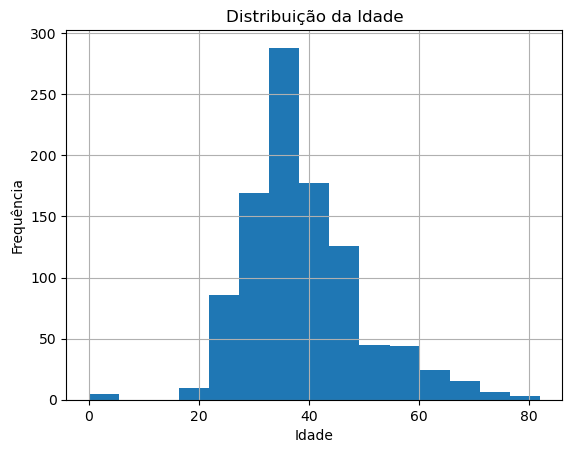

In [113]:
#Histograma de distribuição de idade
dataset['Idade'].hist(bins=15)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


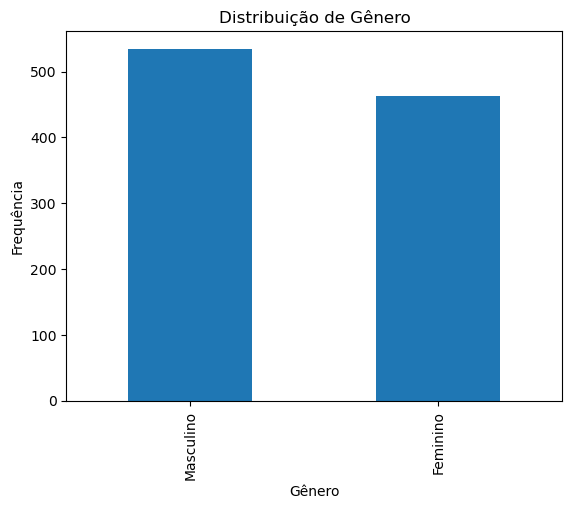

In [124]:
#Gráfico de barras de cliente por estado
dataset['Genero'].value_counts().plot(kind='bar')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

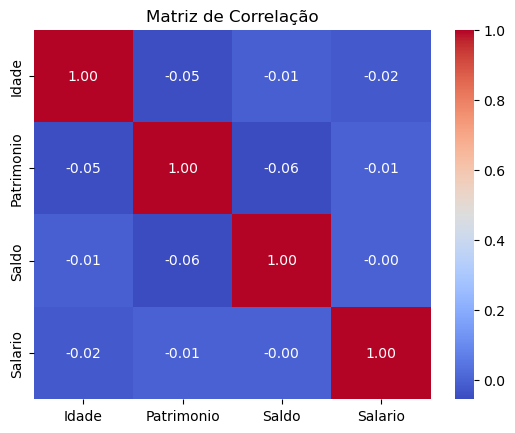

In [126]:
#Mapa de calor
corr_matrix = dataset[['Idade', 'Patrimonio', 'Saldo', 'Salario']].corr()
srn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

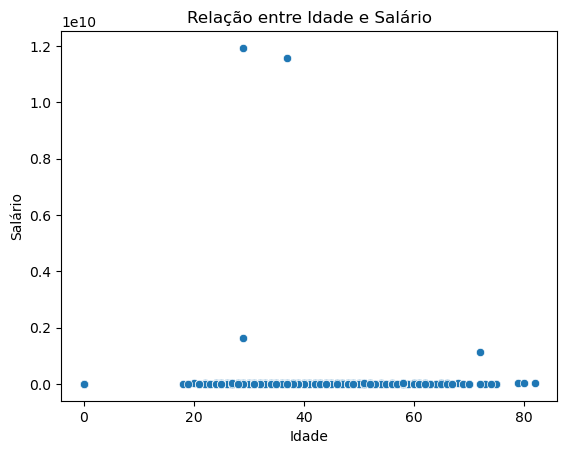

In [128]:
#Gráfico de relação de idade e salário
srn.scatterplot(x='Idade', y='Salario', data=dataset)
plt.title('Relação entre Idade e Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

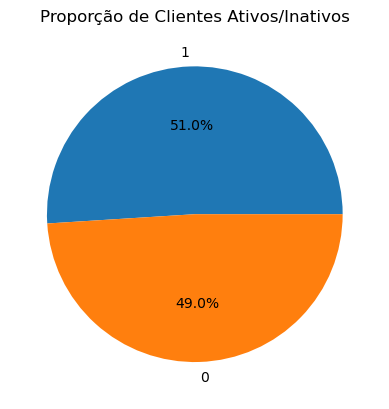

In [130]:
#Gráfico de torta da proporção entre clientes ativos e inativos
dataset['Ativo'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporção de Clientes Ativos/Inativos')
plt.ylabel('')
plt.show()